<a href="https://colab.research.google.com/github/yamenetoo/ST/blob/main/DLE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install plot-ann

import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from plot_ann import ann

#Important function

In [2]:
def plot_boxplot(data, name_of_labels="HN"):
    labels=[f'{name_of_labels}_{i}' for i in range(1,layer_output_2.shape[1]+1)]
    plt.boxplot(data, labels=labels)
    plt.xlabel('Data')
    plt.ylabel('Value')
    plt.title(f'outputs Box Plot of {len(labels)} {name_of_labels}')
    plt.xticks(rotation=90)
    plt.show()


In [3]:
def drop_node(r,empty_col):
  shape=r.shape
  if len(shape)==1:
    if len(r)==1:
      return(r)
    else:
      r= np.delete(r, empty_col)
      return r
  else:
    if shape[1]==1:
      r= np.delete(r, empty_col,axis=0)
      return r
    if shape[1]>1:
      r= np.delete(r, empty_col,axis=1)
      return r



In [4]:
def intermediate_layer(layer_name,model,X_binary):
  intermediate_layer_model = keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
  layer_output = intermediate_layer_model.predict(X_binary)
  return layer_output

In [5]:
def plot_corr_matrix(data):
  correlation_matrix = data.corr()
  plt.figure(figsize=(8, 6))
  heatmap = plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
  plt.colorbar(heatmap)

  for i in range(len(correlation_matrix)):
      for j in range(len(correlation_matrix)):
          plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black')
  plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
  plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
  plt.title("Correlation Matrix of HL output")
  plt.show()


In [6]:
def plot_scatter(df, x_column, y_column, label_column):
    colors = ['r' if value == 0 else 'b' for value in label_column]
    plt.scatter(df[x_column], df[y_column], c=colors, label='البيانات')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{x_column} VS {y_column}')
    plt.show()

In [7]:
def generate_pairs(A):
    pairs = []
    for num1 in A:
        for num2 in A:
            pairs.append((num1, num2))
    return pairs

In [8]:
def plot_ann(L):
  """https://pypi.org/project/plot-ann/"""
  ax, *_ = ann(L,layer_labels=['Input', 'HL',"Output"])
  ax.set_aspect('equal')

In [9]:
def make_model(new_Hn_number):
  model = keras.Sequential()
  model.add(layers.Input(shape=(X_train.shape[1],), name='input_layer'))  # Input layer with features
  model.add(layers.Dense(new_Hn_number, activation='relu', name='HL'))  # Hidden layer with 10 neurons and ReLU activation
  model.add(layers.Dense(1, activation='sigmoid', name='OL'))  # Output layer with 1 neuron and sigmoid activation
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  plot_ann([X_train.shape[1],new_Hn_number, 1])

  return model

#First MODEL

Epoch 1/10
80/80 [==============================] - 2s 5ms/step - loss: 0.7645 - accuracy: 0.4875
Epoch 2/10
80/80 [==============================] - 0s 4ms/step - loss: 0.6658 - accuracy: 0.5250
Epoch 3/10
80/80 [==============================] - 0s 4ms/step - loss: 0.5842 - accuracy: 0.7000
Epoch 4/10
80/80 [==============================] - 0s 6ms/step - loss: 0.5018 - accuracy: 0.7625
Epoch 5/10
80/80 [==============================] - 0s 6ms/step - loss: 0.4284 - accuracy: 1.0000
Epoch 6/10
80/80 [==============================] - 1s 7ms/step - loss: 0.3635 - accuracy: 1.0000
Epoch 7/10
80/80 [==============================] - 1s 7ms/step - loss: 0.3076 - accuracy: 1.0000
Epoch 8/10
80/80 [==============================] - 1s 7ms/step - loss: 0.2547 - accuracy: 1.0000
Epoch 9/10
80/80 [==============================] - 1s 8ms/step - loss: 0.2130 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 547ms/step
Accuracy: 1.0


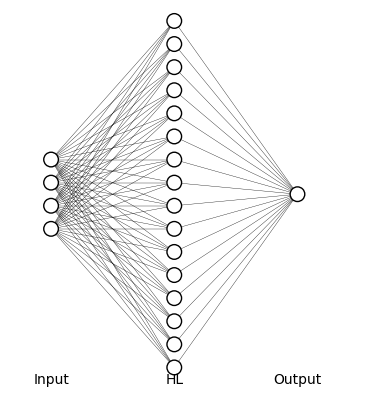

In [10]:
iris = load_iris()
X = iris.data
y = iris.target
Hn_number=16
binary_classes = [0, 1]
X_binary = X[np.isin(y, binary_classes)]
y_binary = y[np.isin(y, binary_classes)]
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

model=make_model(Hn_number)
model.fit(X_train, y_train, epochs=10, batch_size=1)

y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL (Dense)                  (None, 16)                80        
                                                                 
 OL (Dense)                  (None, 1)                 17        
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#HL2

In [12]:
layer_name = 'HL'
layer_output_2=intermediate_layer(layer_name,model,X_binary)
print(layer_output_2.shape)

4/4 [==============================] - 0s 5ms/step
(100, 16)


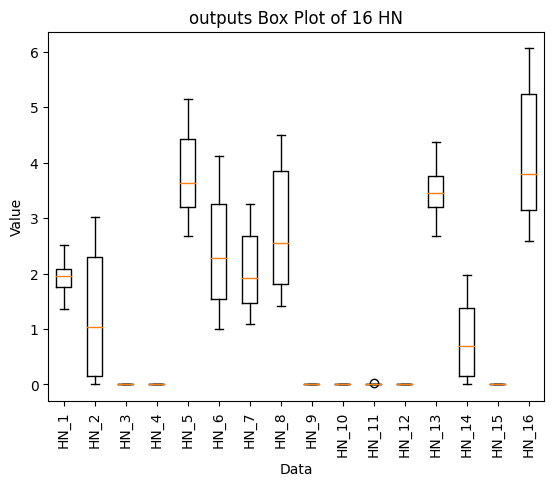

In [13]:
plot_boxplot(layer_output_2)

In [14]:
import pandas as pd
data=layer_output_2
labels=[i for i in range(layer_output_2.shape[1])]
dataDF=pd.DataFrame(data,columns=labels)

In [15]:
summary_stats = dataDF.describe()
print("Summary Statistics:")
print()
summary_stats


Summary Statistics:



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.000000,100.0,100.000000,100.000000,100.0,100.000000
mean,1.926584,1.244951,0.0,0.0,3.818531,2.413635,2.091518,2.807956,0.0,0.0,0.000228,0.0,3.492638,0.769633,0.0,4.181760
std,0.228637,1.113027,0.0,0.0,0.717336,0.913526,0.669858,1.033541,0.0,0.0,0.002282,0.0,0.374774,0.636950,0.0,1.131694
min,1.360039,0.000000,0.0,0.0,2.672192,0.995400,1.088116,1.419258,0.0,0.0,0.000000,0.0,2.683764,0.000000,0.0,2.582270
25%,1.759237,0.151457,0.0,0.0,3.198871,1.543685,1.477023,1.804981,0.0,0.0,0.000000,0.0,3.193175,0.153067,0.0,3.152310
50%,1.948268,1.031944,0.0,0.0,3.633404,2.274707,1.927727,2.553050,0.0,0.0,0.000000,0.0,3.460952,0.699313,0.0,3.799220
75%,2.088134,2.290671,0.0,0.0,4.427797,3.258725,2.671472,3.855365,0.0,0.0,0.000000,0.0,3.751124,1.377713,0.0,5.244460
max,2.520326,3.019217,0.0,0.0,5.157504,4.113667,3.249479,4.498108,0.0,0.0,0.022820,0.0,4.378465,1.975793,0.0,6.061283


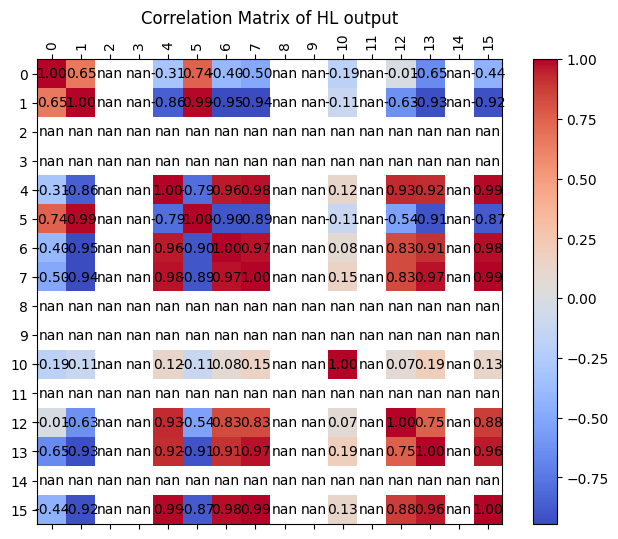

In [16]:
plot_corr_matrix(dataDF)

##processing

In [17]:
empty_col=np.where(summary_stats.iloc[2]==0)[0]
print(f"size of empty nurons is {empty_col.shape[0]},which are {empty_col}" )

size of empty nurons is 6,which are [ 2  3  8  9 11 14]


In [18]:
layer_weights = model.get_weights()
dic={}
for i, weights in enumerate(layer_weights):
  dic[f"L{i}"]=weights
  # print(f"Weights for Layer {i} (shape: {weights.shape}):\n{weights}")

##Find the number of new neurons

In [19]:
new_Hn_number=Hn_number-empty_col.shape[0]
print(f"new_Hn_number= {new_Hn_number}")

new_Hn_number= 10


 # model2 Create a new network

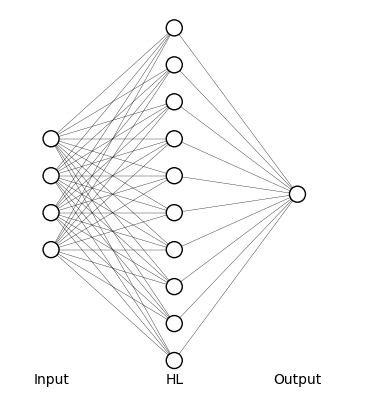

In [20]:
model2=make_model(new_Hn_number)

##Create a dictionary containing the weights of the new network from the old weights

 by deleting the weights related to the old neurons.

In [37]:
new_dic={}
for i, weights in enumerate(layer_weights):
  new_dic[f"L{i}"]=drop_node(weights,empty_col)

##Transfer the weights to the new model2


In [38]:
# Set the custom weights for each layer
model2.layers[0].set_weights([new_dic['L0'], new_dic['L1']])
model2.layers[1].set_weights([new_dic['L2'], new_dic['L3']])

In [39]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL (Dense)                  (None, 10)                50        
                                                                 
 OL (Dense)                  (None, 1)                 11        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##model2 test

In [40]:
y_pred2 = (model2.predict(X_test) > 0.5).astype(int).flatten()
accuracy2 = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy2}")


1/1 [==============================] - 0s 19ms/step
Accuracy: 1.0


In [41]:
np.c_[model.predict(X_test),model2.predict(X_test)]


1/1 [==============================] - 0s 18ms/step


array([[0.95637286, 0.95637286],
       [0.882861  , 0.882861  ],
       [0.95452726, 0.95452726],
       [0.18794094, 0.18794088],
       [0.26072052, 0.26072052],
       [0.16591261, 0.16591261],
       [0.12088879, 0.12088876],
       [0.84534115, 0.8453412 ],
       [0.14007466, 0.14007466],
       [0.1479847 , 0.1479847 ],
       [0.1570924 , 0.1570924 ],
       [0.21560006, 0.21560006],
       [0.9237229 , 0.9237229 ],
       [0.11375248, 0.11375254],
       [0.9206616 , 0.92066157],
       [0.15342908, 0.15342912],
       [0.9105995 , 0.9105995 ],
       [0.93990505, 0.939905  ],
       [0.16940534, 0.16940534],
       [0.16081423, 0.16081415]], dtype=float32)

In [42]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL (Dense)                  (None, 10)                50        
                                                                 
 OL (Dense)                  (None, 1)                 11        
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
Out=intermediate_layer("HL",model2,X_binary)
print("model2 Output shape",Out.shape)

4/4 [==============================] - 0s 2ms/step
model2 Output shape (100, 10)


In [44]:
data=pd.DataFrame(Out, columns=[i for i in range(1,Out.shape[1]+1)])
data

,1,2,3,4,5,6,7,8,9,10
0,2.132456,2.436573,3.211794,3.400052,1.468717,1.790739,0.0,3.293951,0.107785,3.125936
1,2.085464,2.050085,3.051703,3.049208,1.562996,1.721135,0.0,3.093697,0.000000,2.996035
2,1.970139,2.233437,2.954841,3.123773,1.367149,1.655282,0.0,3.030650,0.094554,2.875633
3,1.872706,2.055962,2.953500,2.896021,1.412802,1.708468,0.0,3.027128,0.199781,2.977610
4,2.061405,2.504236,3.178076,3.404934,1.384496,1.777500,0.0,3.277602,0.183460,3.102968
...,...,...,...,...,...,...,...,...,...,...
95,1.654911,0.352838,4.346314,1.597424,2.530978,3.652343,0.0,3.756907,1.473458,5.166700
96,1.654450,0.237532,4.342585,1.544866,2.551220,3.713537,0.0,3.682083,1.467245,5.135293
97,1.914993,0.223914,4.606784,1.713233,2.812072,3.849912,0.0,3.913860,1.329512,5.384574
98,1.713444,0.555879,3.635796,1.838701,2.126920,2.965301,0.0,3.082201,0.852943,4.022753


In [45]:
# new_dic['L2']# here is beta in LR
# r=(Out@new_dic['L2'])+new_dic['L3'] #new_dic['L3'] is beta0
# manual=tf.keras.activations.sigmoid(r).numpy()
# #model2.predict(X_binary)==manual its true

In [46]:
#Out is Independent Var

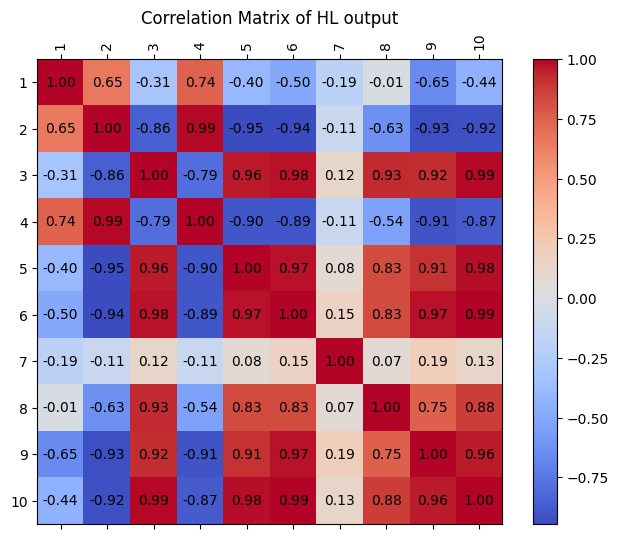

In [47]:
plot_corr_matrix(data)

## Dropp highly correlated independent variables

In [48]:
correlation_matrix=data.corr()
correlation_threshold = 0.7  # Adjust this threshold as needed
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            variable1 = correlation_matrix.columns[i]
            variable2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append((variable1, variable2))
highly_correlated_pairs

[(3, 2),
 (4, 1),
 (4, 2),
 (4, 3),
 (5, 2),
 (5, 3),
 (5, 4),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (8, 3),
 (8, 5),
 (8, 6),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 8),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 8),
 (10, 9)]

In [49]:
correlation_matrix = data.corr()
correlation_threshold = 0.7
highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

# Drop the highly correlated columns
df = data.drop(highly_correlated_columns, axis=1)

In [50]:
df

,1,2,7
0,2.132456,2.436573,0.0
1,2.085464,2.050085,0.0
2,1.970139,2.233437,0.0
3,1.872706,2.055962,0.0
4,2.061405,2.504236,0.0
...,...,...,...
95,1.654911,0.352838,0.0
96,1.654450,0.237532,0.0
97,1.914993,0.223914,0.0
98,1.713444,0.555879,0.0


In [51]:
df.describe()

,1,2,7
count,100.000000,100.000000,100.000000
mean,1.926584,1.244951,0.000228
std,0.228637,1.113027,0.002282
min,1.360039,0.000000,0.000000
25%,1.759237,0.151457,0.000000
50%,1.948268,1.031944,0.000000
75%,2.088134,2.290671,0.000000
max,2.520326,3.019217,0.022820


(1, 2)


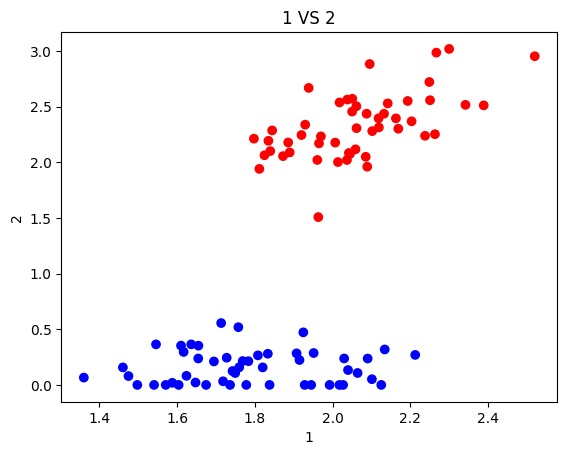

(1, 7)


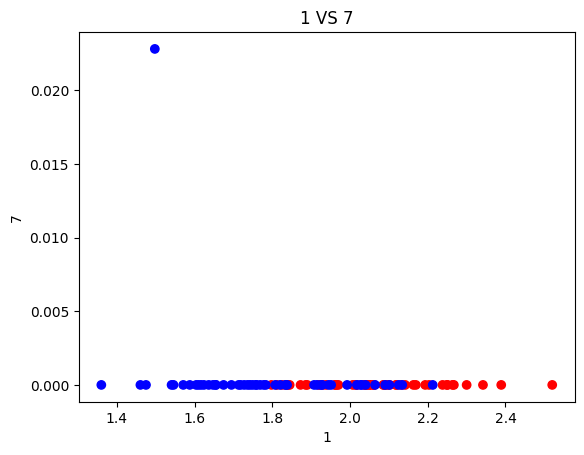

(2, 1)


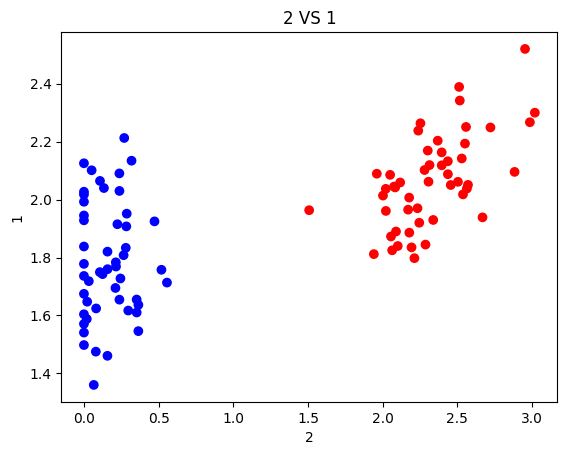

(2, 7)


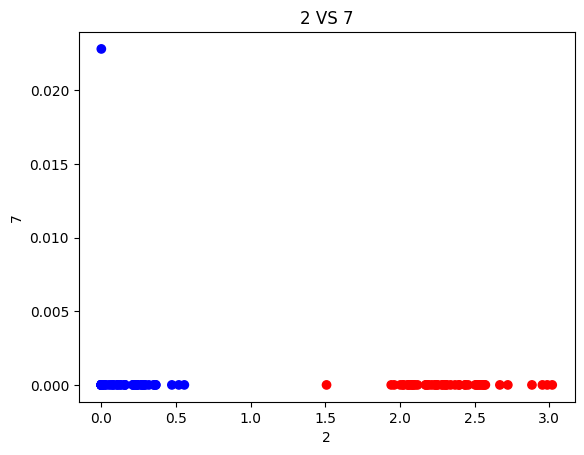

(7, 1)


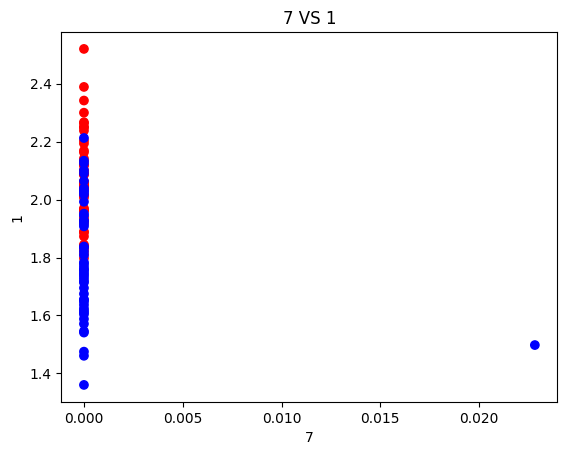

(7, 2)


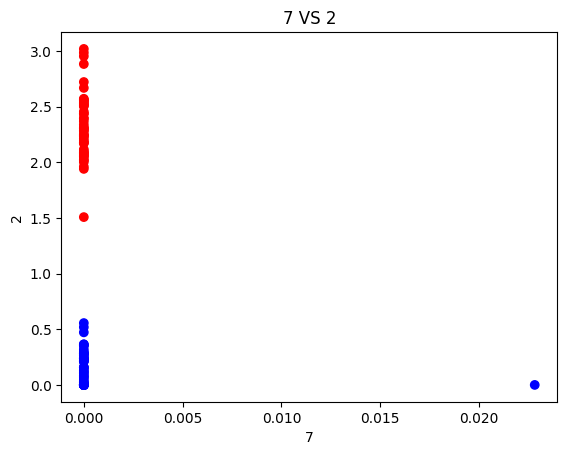

In [52]:
pairs = generate_pairs(df.columns)
for pair in pairs:
    if  pair[0]==pair[1]:
      continue
    print(pair)
    plot_scatter(data, pair[0], pair[1], y_binary)

In [58]:
# هنا لدينا متغيرات فصل تام

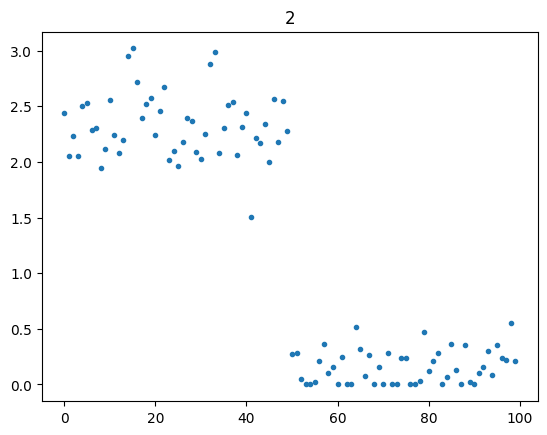

In [61]:
import matplotlib.pyplot as plt
import numpy as np
the_best= df.var().idxmax()
colors = ['r' if value == 0 else 'b' for value in y_binary]
plt.plot(df[the_best],".")
plt.title(the_best)
plt.show()


In [63]:
import statsmodels.api as sm
Out = sm.add_constant(df[the_best].to_numpy())
logit_model = sm.Logit(y_binary,df[the_best])
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.429445
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                  0.3804
Time:                        05:35:06   Log-Likelihood:                -42.945
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
2             -1.3543      0.301     -4.505      0.000      -1.944      -0.765


[1, 2, 7]

#model3

In [70]:
layer_weights = model2.get_weights()
dic3={}
for i, weights in enumerate(layer_weights):
  dic[f"L{i}"]=weights
  # print(f"Weights for Layer {i} (shape: {weights.shape}):\n{weights}")

In [71]:
empty_col=[i for i in range(new_Hn_number) if not i in list(df.columns)]
empty_col

[0, 3, 4, 5, 6, 8, 9]

In [72]:
new_dic={}
for i, weights in enumerate(layer_weights):
  new_dic[f"L{i}"]=drop_node(weights,empty_col)

In [73]:
new_dic

{'L0': array([[ 0.06881316,  0.46954682,  0.40285406],
        [ 0.74544865,  0.13236353,  0.23936488],
        [-0.48024353,  0.29425138,  0.30349854],
        [-0.4076161 ,  0.09507035, -0.50886965]], dtype=float32),
 'L1': array([ 0.23041905, -0.07713331,  0.07849377], dtype=float32),
 'L2': array([[-0.50469273],
        [ 0.11955066],
        [-0.35893252]], dtype=float32),
 'L3': array([-0.07939506], dtype=float32)}

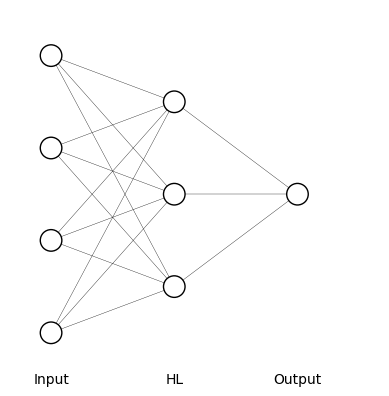

In [76]:
model3=make_model(df.shape[1])
model3.layers[0].set_weights([new_dic['L0'], new_dic['L1']])
model3.layers[1].set_weights([new_dic['L2'], new_dic['L3']])

In [78]:
y_pred3 = (model3.predict(X_test) > 0.5).astype(int).flatten()
accuracy3 = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy2}")


1/1 [==============================] - 0s 37ms/step
Accuracy: 1.0


In [80]:
np.c_[model.predict(X_test),model2.predict(X_test),model3.predict(X_test)]


1/1 [==============================] - 0s 27ms/step


array([[0.95637286, 0.95637286, 0.28852612],
       [0.882861  , 0.882861  , 0.3084541 ],
       [0.95452726, 0.95452726, 0.29570758],
       [0.18794094, 0.18794088, 0.14095739],
       [0.26072052, 0.26072052, 0.11134383],
       [0.16591261, 0.16591261, 0.11446164],
       [0.12088879, 0.12088876, 0.10359235],
       [0.84534115, 0.8453412 , 0.28877625],
       [0.14007466, 0.14007466, 0.09825122],
       [0.1479847 , 0.1479847 , 0.10837489],
       [0.1570924 , 0.1570924 , 0.09755425],
       [0.21560006, 0.21560006, 0.13490807],
       [0.9237229 , 0.9237229 , 0.27557632],
       [0.11375248, 0.11375254, 0.07804967],
       [0.9206616 , 0.92066157, 0.29373994],
       [0.15342908, 0.15342912, 0.10529186],
       [0.9105995 , 0.9105995 , 0.26953003],
       [0.93990505, 0.939905  , 0.27713308],
       [0.16940534, 0.16940534, 0.1315517 ],
       [0.16081423, 0.16081415, 0.11889178]], dtype=float32)

In [81]:
model3.fit(X_train, y_train, epochs=25, batch_size=1)


Epoch 1/25
80/80 [==============================] - 1s 2ms/step - loss: 0.6104 - accuracy: 0.4750
Epoch 2/25
80/80 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.9000
Epoch 3/25
80/80 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 1.0000
Epoch 4/25
80/80 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 1.0000
Epoch 5/25
80/80 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 1.0000
Epoch 6/25
80/80 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 1.0000
Epoch 7/25
80/80 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 1.0000
Epoch 8/25
80/80 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 1.0000
Epoch 9/25
80/80 [==============================] - 0s 2ms/step - loss: 0.1678 - accuracy: 1.0000
Epoch 10/25
80/80 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 1.0000
Epoch 11/25
80/80 [

In [82]:
np.c_[model.predict(X_test),model2.predict(X_test),model3.predict(X_test)]

1/1 [==============================] - 0s 172ms/step


array([[0.95637286, 0.95637286, 0.98888904],
       [0.882861  , 0.882861  , 0.9764558 ],
       [0.95452726, 0.95452726, 0.98838407],
       [0.18794094, 0.18794088, 0.05328273],
       [0.26072052, 0.26072052, 0.03997756],
       [0.16591261, 0.16591261, 0.02716031],
       [0.12088879, 0.12088876, 0.00939652],
       [0.84534115, 0.8453412 , 0.96938634],
       [0.14007466, 0.14007466, 0.01669276],
       [0.1479847 , 0.1479847 , 0.01991108],
       [0.1570924 , 0.1570924 , 0.02331065],
       [0.21560006, 0.21560006, 0.05104573],
       [0.9237229 , 0.9237229 , 0.98306155],
       [0.11375248, 0.11375254, 0.00644251],
       [0.9206616 , 0.92066157, 0.9784124 ],
       [0.15342908, 0.15342912, 0.01712961],
       [0.9105995 , 0.9105995 , 0.98776853],
       [0.93990505, 0.939905  , 0.99060357],
       [0.16940534, 0.16940534, 0.03618987],
       [0.16081423, 0.16081415, 0.03944804]], dtype=float32)